In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('data.csv')
durations = []
dT = 0.01  # it will be  changed

with open('/home/marcel/catkin_ws/src/dynamic-model-car-simulator/params.txt') as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])


data = pd.DataFrame(data=data_raw)
interest_a = 190
interest_b = 210
dT = data['t'][1]-data['t'][0]
d = data[interest_a:interest_b] #19 30

n = 1   # granularity
data.head(20)

,x,y,t,torque,steering_angle,long_acc,long_vel,lat_acc,lat_vel,yaw_angle,...,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r,track_progress,error
0,0.000998,8.378700e-30,0.000,-390.000,2.955360e-24,-2.01238,0.997988,8.378700e-24,8.378700e-27,9.106760e-30,...,2.955360e-24,0.000000e+00,6533.75,6143.75,3.230880e-24,0.000000e+00,1.467900e-20,0.000000e+00,0.0,8.881780e-16
1,0.001994,2.507150e-29,0.001,-390.000,2.955360e-24,-2.01238,0.995975,8.305030e-24,1.668370e-26,2.717730e-29,...,2.928710e-24,9.854650e-27,6533.75,6143.75,3.201750e-24,1.145720e-26,1.454670e-20,4.868400e-23,0.0,8.881780e-16
2,0.002988,5.001410e-29,0.002,-390.000,2.955360e-24,-2.01238,0.993963,8.231850e-24,2.491560e-26,5.407030e-29,...,2.902340e-24,1.951760e-26,6533.75,6143.75,3.172910e-24,2.269160e-26,1.441570e-20,9.642110e-23,0.0,8.881780e-16
3,0.003980,8.314250e-29,0.003,-390.000,2.955360e-24,-2.01238,0.991950,8.159170e-24,3.307470e-26,8.964630e-29,...,2.876240e-24,2.899110e-26,6533.75,6143.75,3.144370e-24,3.370570e-26,1.428600e-20,1.432220e-22,0.0,8.881780e-16
4,0.004970,1.243930e-28,0.004,-390.000,2.955360e-24,-2.01238,0.989938,8.086970e-24,4.116170e-26,1.337680e-28,...,2.850400e-24,3.827730e-26,6533.75,6143.75,3.116130e-24,4.450210e-26,1.415770e-20,1.890980e-22,0.0,8.881780e-16
5,0.005958,1.737020e-28,0.005,-390.000,2.955360e-24,-2.01238,0.987926,8.015260e-24,4.917700e-26,1.862980e-28,...,2.824820e-24,4.737850e-26,6533.75,6143.75,3.088170e-24,5.508330e-26,1.403060e-20,2.340590e-22,0.0,8.881780e-16
6,0.006944,2.310070e-28,0.006,-390.000,2.955360e-24,-2.01238,0.985913,7.944030e-24,5.712100e-26,2.471040e-28,...,2.799510e-24,5.629670e-26,6533.75,6143.75,3.060490e-24,6.545180e-26,1.390490e-20,2.781170e-22,0.0,8.881780e-16
7,0.007928,2.962440e-28,0.007,-390.000,2.955360e-24,-2.01238,0.983901,7.873270e-24,6.499430e-26,3.160520e-28,...,2.774450e-24,6.503410e-26,6533.75,6143.75,3.033100e-24,7.561010e-26,1.378050e-20,3.212820e-22,0.0,8.881780e-16
8,0.008909,3.693520e-28,0.008,-390.000,2.955360e-24,-2.01238,0.981889,7.802980e-24,7.279720e-26,3.930120e-28,...,2.749650e-24,7.359290e-26,6533.75,6143.75,3.005990e-24,8.556070e-26,1.365730e-20,3.635640e-22,0.0,8.881780e-16
9,0.009889,4.502670e-28,0.009,-390.000,2.955360e-24,-2.01238,0.979876,7.733150e-24,8.053040e-26,4.778550e-28,...,2.725110e-24,8.197510e-26,6533.75,6143.75,2.979150e-24,9.530610e-26,1.353540e-20,4.049740e-22,0.0,8.881780e-16


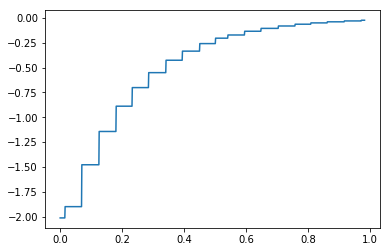

In [63]:
plt.plot(data['t'], data['long_acc'])

In [64]:
#change_1 = int(angle_ch_t_1/dT)
#change_2 = int(angle_ch_t_2/dT)
#change_1

Text(0.5, 1.0, 'speed(t)')

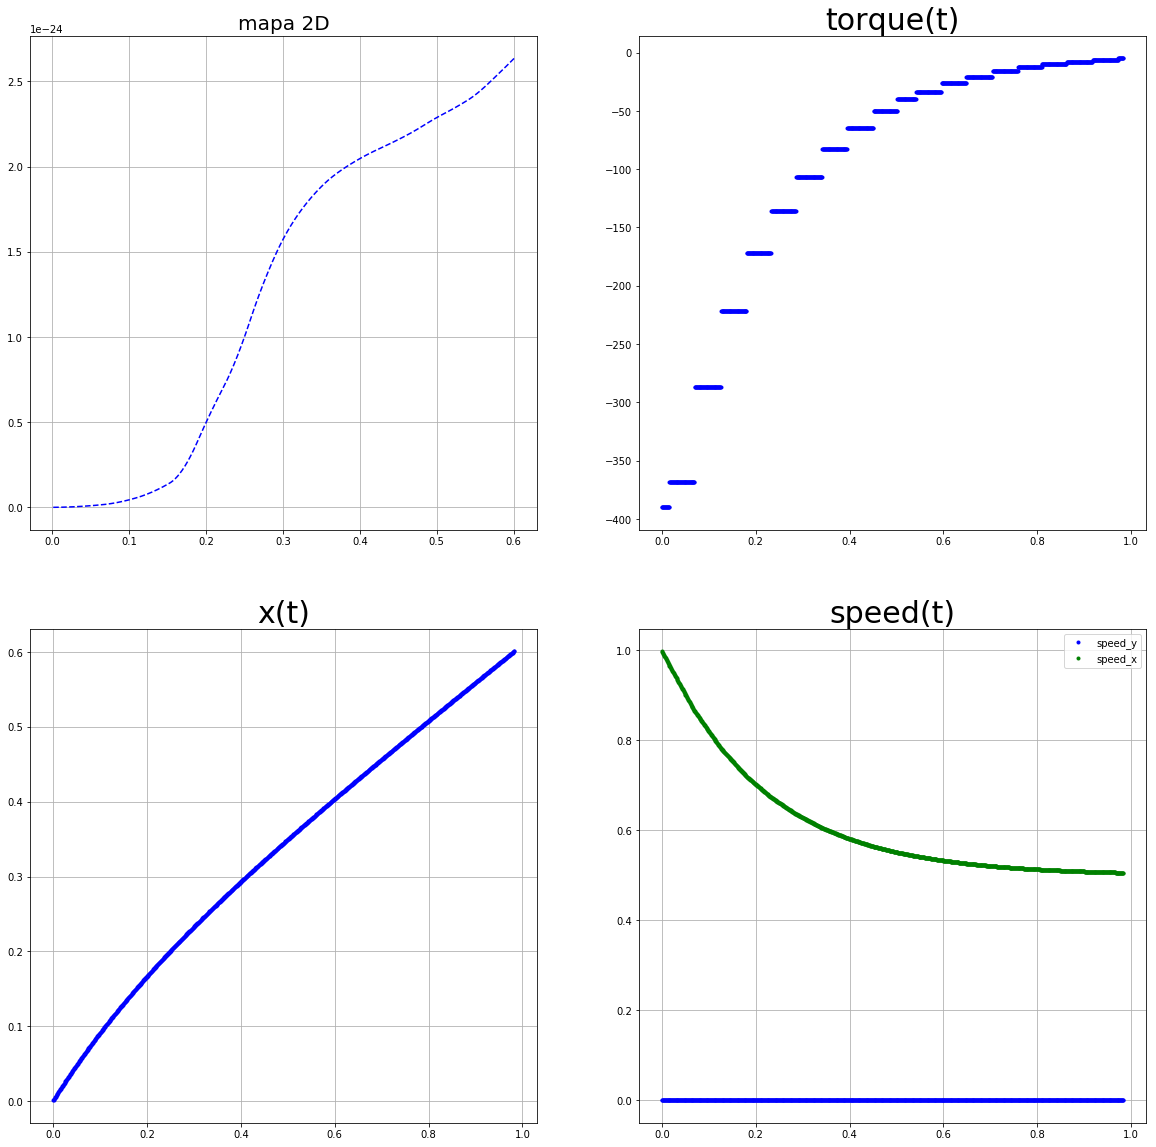

In [65]:
begin = 4  #secconds
end = 5    #secconds

plt.figure(figsize=(20,20))
granularity = 1

x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
speed_x = data['long_vel'][::granularity]
speed_y = data['lat_vel'][::granularity]

# mapa 2d
ax = plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(t, x, '.b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
#ax.set_aspect('equal')


# y(t)
#ax = plt.subplot(223)
#plt.plot(t, y, '--b')
#plt.grid(True)
#plt.title('y(t)', fontsize=30)
#ax.set_aspect('equal')

ax = plt.subplot(222)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '.b', label='speed_y')
ax.plot(t, speed_x, '.g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('speed(t)', fontsize=30)
#ax.set_aspect('equal')


[]

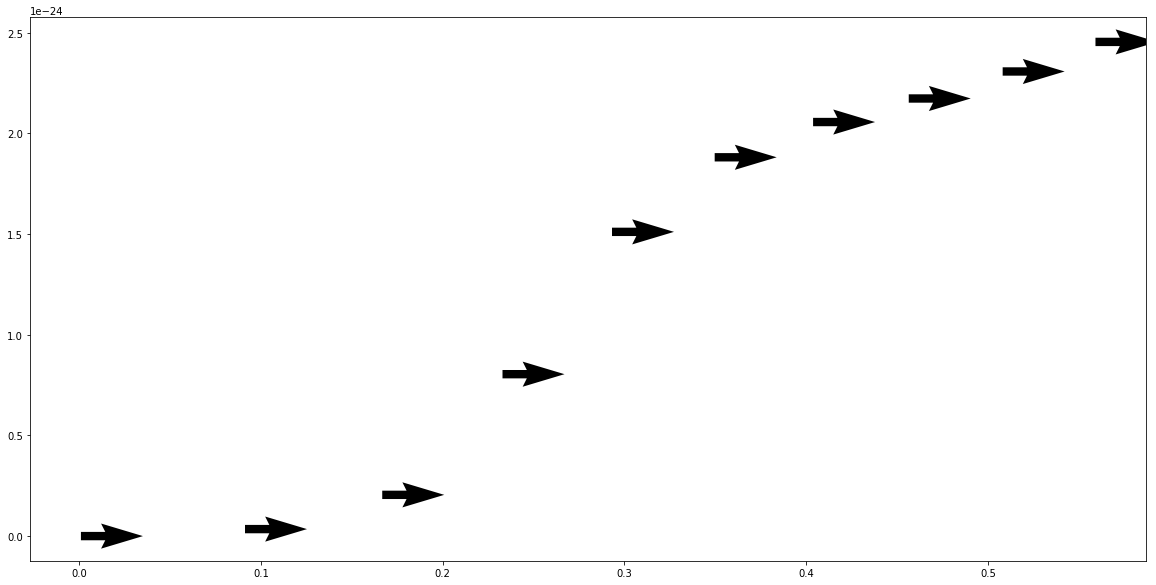

In [66]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 100

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
#ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

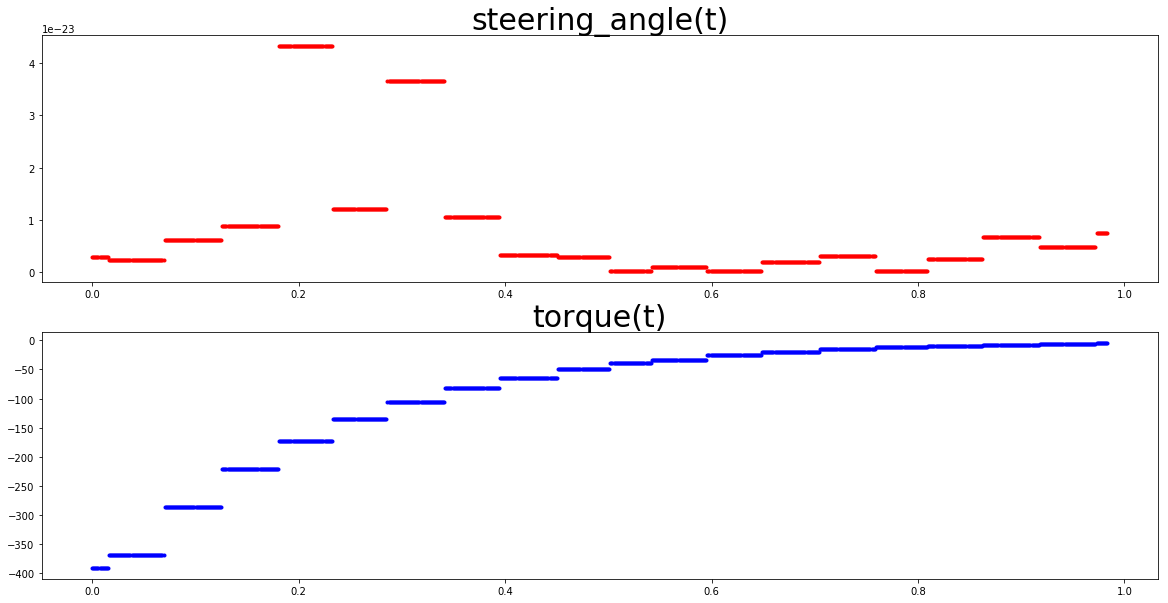

In [67]:
fig = plt.figure(figsize=(20,10))
granularity = 1
plt.subplot(211)
plt.plot(data['t'][:][::granularity], data['steering_angle'][:][::granularity], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

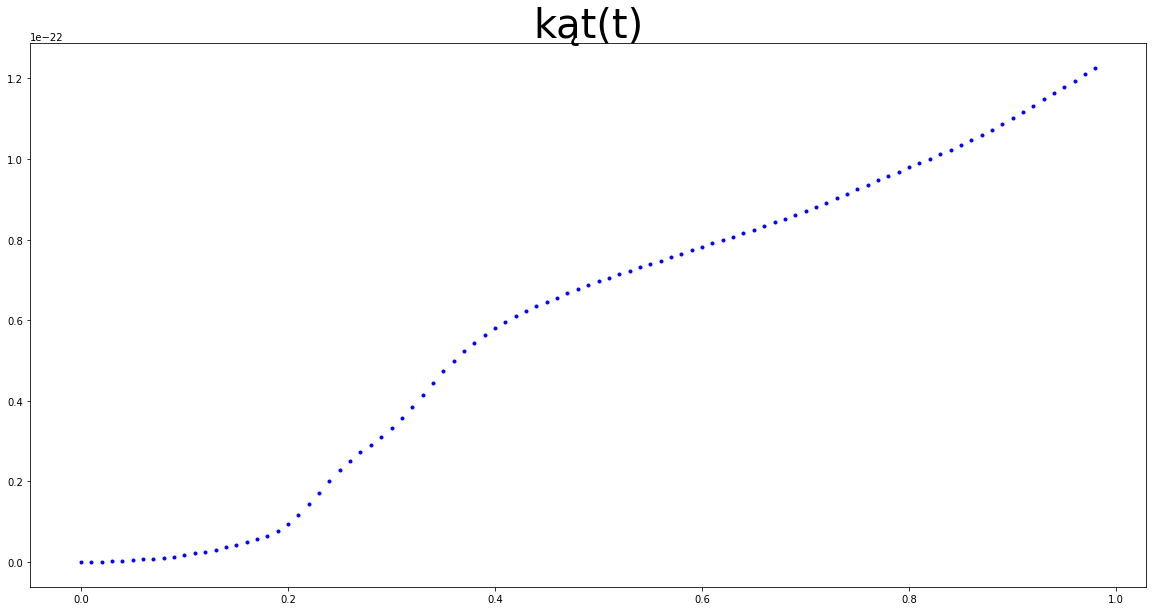

In [68]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][:][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

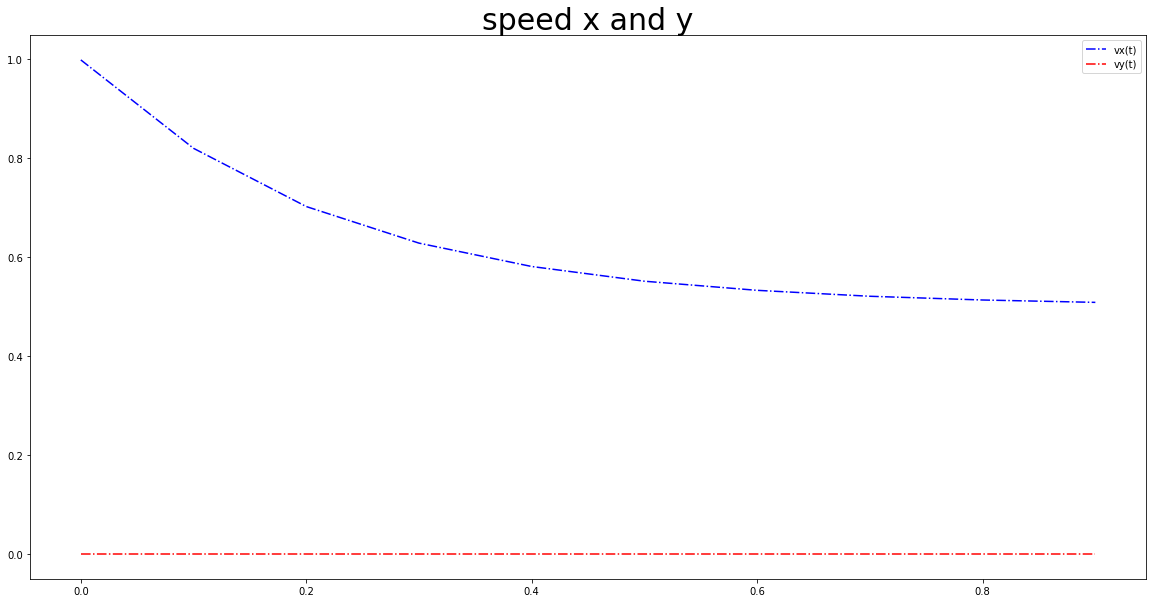

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

In [70]:
max_speed

0.9979879999999999

Text(0.5, 1.0, 'slip_angle_front(t)')

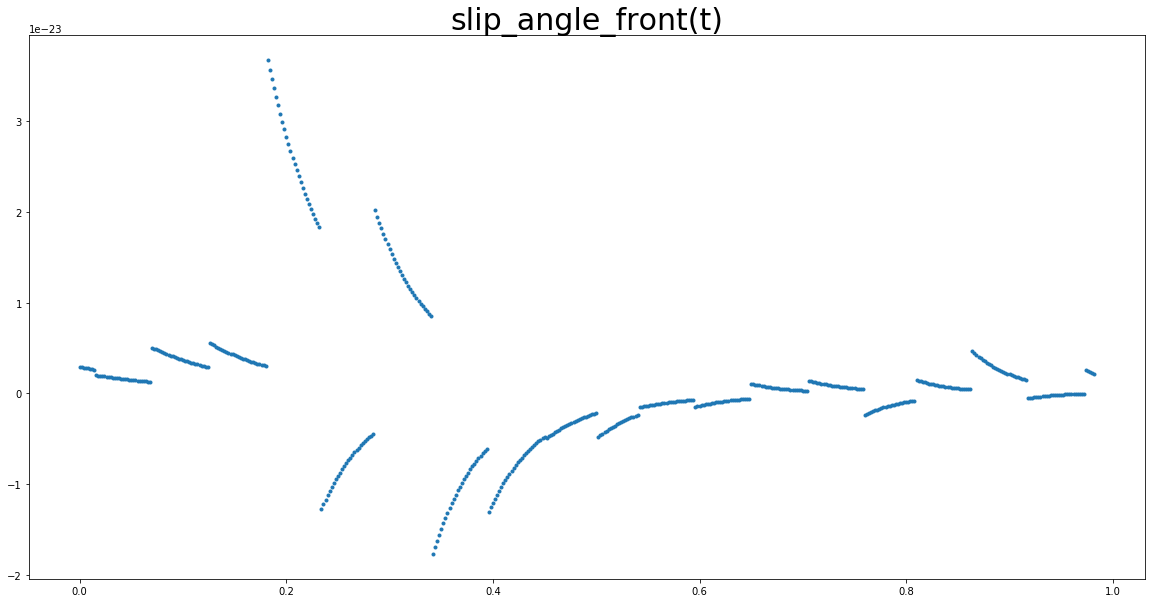

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

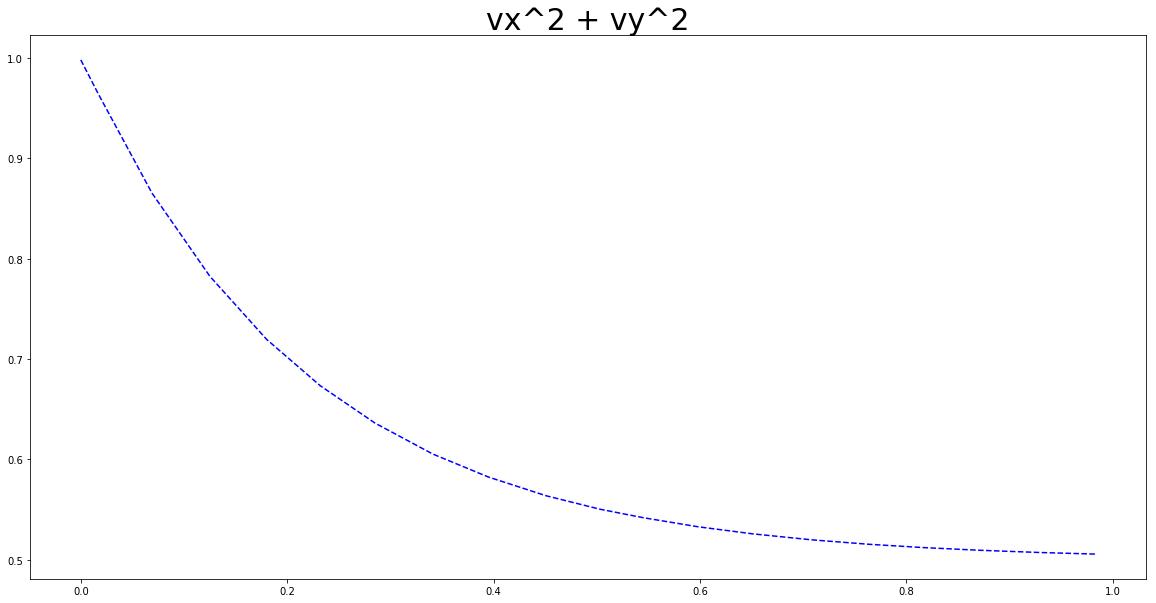

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
plt.title('vx^2 + vy^2', fontsize=30)

/home/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


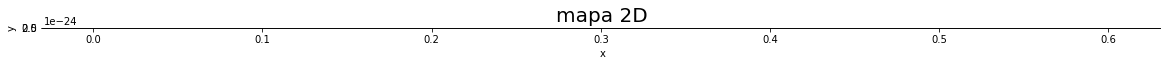

In [73]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:][::n], data['y'][:][::n])

Text(0.5, 1.0, 'x(t)')

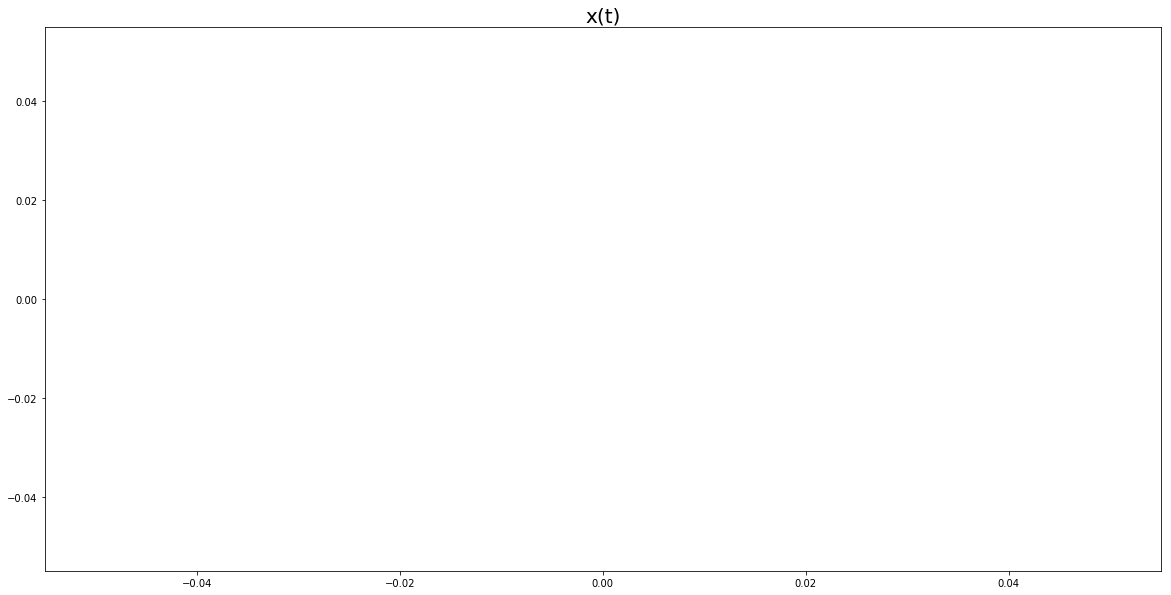

In [74]:
begin = int(4.8 / dT)
end = int(5 / dT)
plt.figure(figsize=(20,10))
plt.plot(data['t'][begin:end], data['x'][begin:end], 'r.')
plt.title('x(t)', fontsize=20)

Text(0.5, 1.0, 'y(t)')

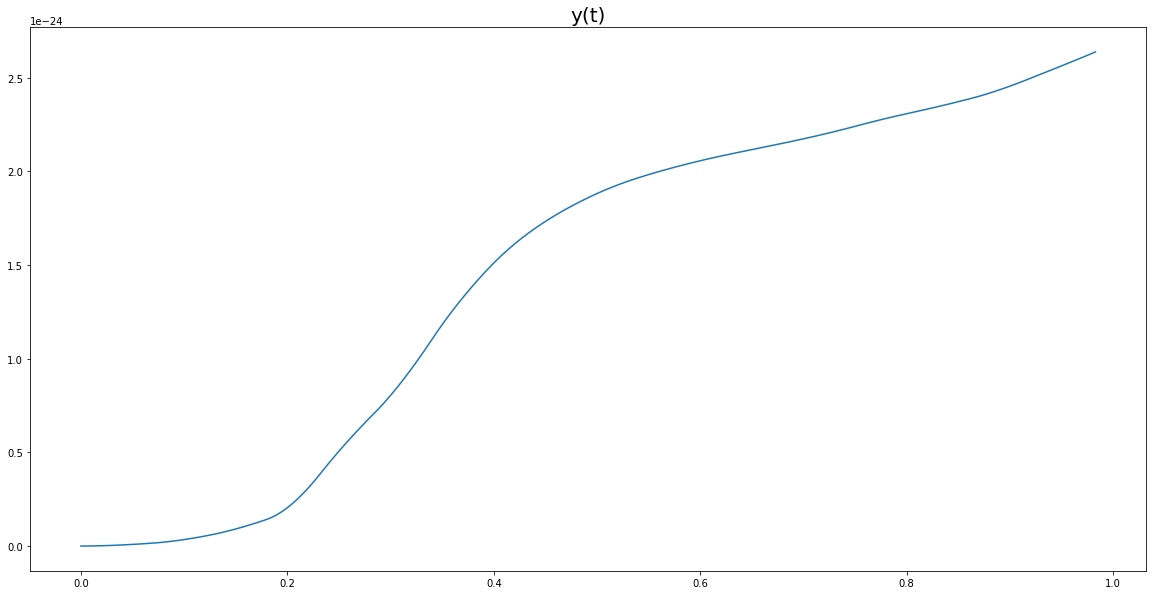

In [75]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

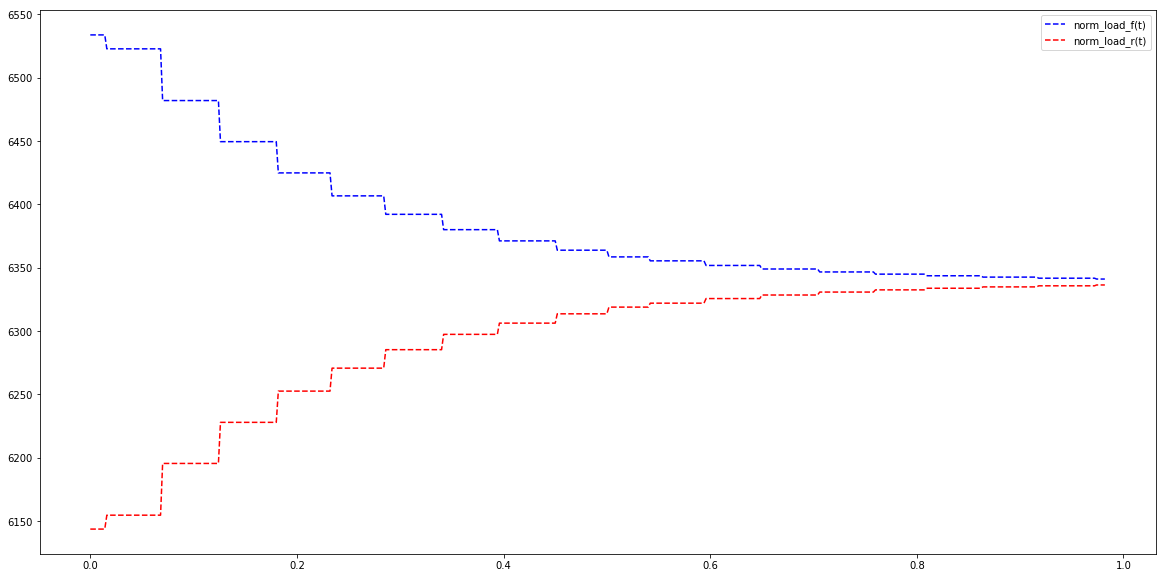

In [76]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], data['norm_load_f'][:][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][:][::n], data['norm_load_r'][:][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

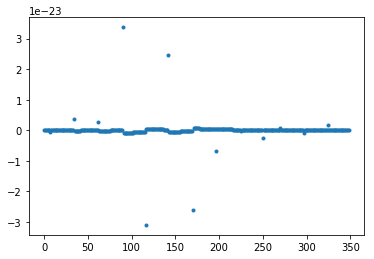

In [77]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')


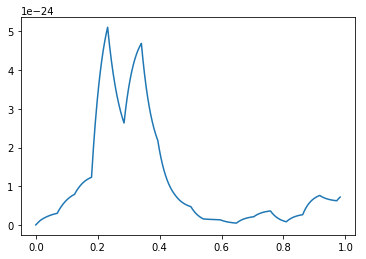

In [78]:
plt.plot(data['t'], data['yaw_rate'])

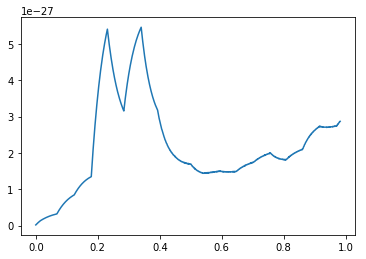

In [79]:
plt.plot(data['t'][:-1], np.diff(data['yaw_angle']))

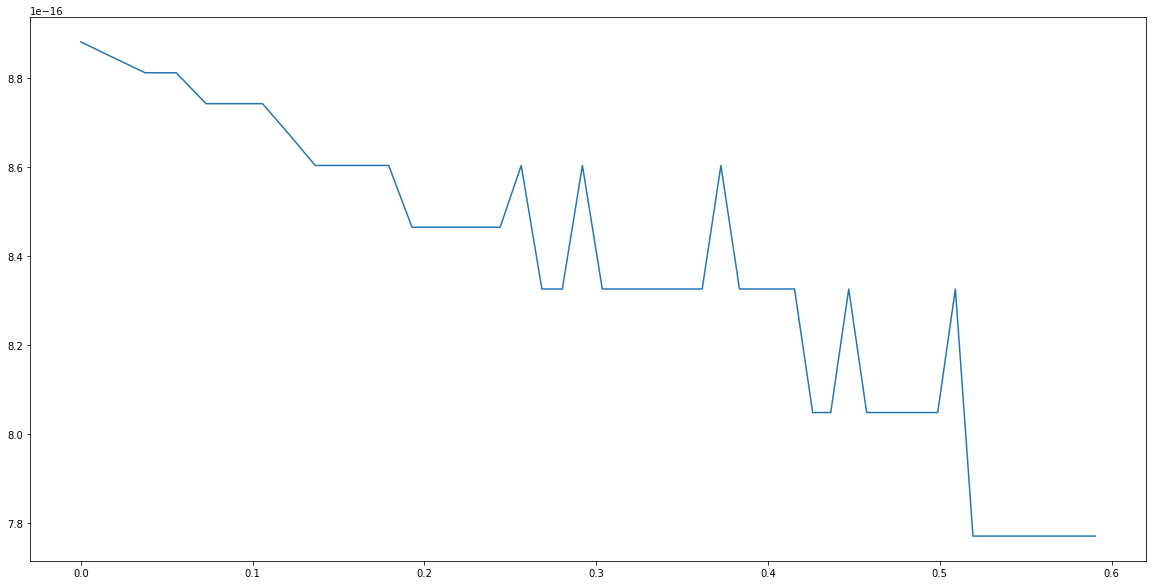

In [80]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['track_progress'], data['error'])

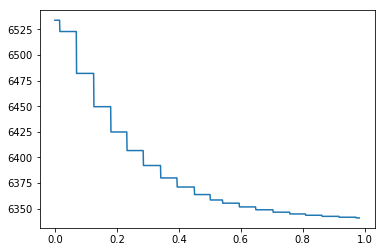

In [81]:
plt.plot(data['t'], data['norm_load_f'])